## Using data wrangling to investigate Twitter's WeRateDogs profile

by Jefferson MAchado Maldonado

____________

In this project, I intend to use data wrangling techniques to clean and organize three sets of data, checking the main quality problems, and leading me to a more precise analysis at the end. Data wrangling is perhaps the most time-consuming process when analyzing data, so care must be taken and a well-defined process to implement it. In the first section, I will gather the three data sources, first **`df_twitter`** than a .txt file. According to **`df_api`** collected via api from twitter itself and collected programmatically. And lastly **`df_image_predictions`** is a .tsv file downloaded programmatically. In the second section I want to access the data, and discover quality and organization problems, as an objective, I intend to solve at least eight quality and two organization problems and list them, in section three, define them, program the necessary code and test. I will do this in each of the problems that I will encounter ahead.

In the fourth section I will try to analyze the data already organized and clean, and produce some insights and visualizations through graphs about the 3 sets of data already merged. The **[@dog_rates](<https://twitter.com/dog_rates>)** profile, also known as **[@WeRateDogs](<https://twitter.com/dog_rates>)** is a Twitter account that classifies the dogs of their owners in a funny way. **[@dog_rates](<https://twitter.com/dog_rates>)** has millions of followers and has achieved worldwide fame for its goal of entertaining its users. My goal is to analyze just over 5,000 profile tweets.

__________

### Table of contents

1. <a href="#Gather">Gather</a>
      <ul>
         <li><a href="#gather_archive">Twitter Data</a></li>
         <li><a href="#gather_api_data">Api Data</a></li>
         <li><a href="#gather_predictions_data">Predictions Data</a></li>
      </ul>


2. <a href="#Acesses">Acesses</a>
      <ul>
         <li><a href="#assess_archive">Twitter Data</a></li>
         <li><a href="#assess_api_data">Api Data</a></li>
         <li><a href="#assess_predictions_data">Predictions Data</a></li>
      </ul>


3. <a href="#listing">Listing quality and tidness problems</a>
        
          
4. <a href="#cleaning">Data cleaning</a>
      

5. <a href="#Analysis">Analysis and insights</a>
      <ul>
         <li><a href="#insight_one">Comparing retweets and standardized favorites over time</a></li>
         <li><a href="#insight_two">The most retweeted and favorite stages</a></li>
         <li><a href="#insight_three">Possible trend between rating and predictions</a></li>
      </ul>

______

## Gather

To be able to do the necessary analysis on the @weratedog profile, I first asked for permission to twitter with a developer profile. After approval, the platform provided me with two API keys but a token.

In this section I will work with 3 sets of data, listed below:
- `df_twitter`
- `df_api`
- `df_image_predictions`

In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import tweepy as tw
import requests
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather_archive'></a>
### Reading the first data set `df_twitter`

- this file is in `.csv`

In [5]:
# reading the dataset twitter archive
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

<a id='gather_api_data'></a>
### Reading the second data set `df_api`

- this data set will be generated via twitter api

In [3]:
# collecting data with twitter api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [16]:
# list of tweets id's from dataset df_twitter
id_twitter = df_twitter.tweet_id
len(id_twitter)

2356

In [19]:
count = 0

# creating a list for tweets 
tweet_list = []

# a dictionary variable with errors 
fails_dict = {}

# starting code execution time
start = time.time()

# loop for to collect json tweets
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in id_twitter:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # saving in the tweet_list variable
            tweet_list.append(tweet._json)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepError as e:
            print("Fail")
            # keeping errors and exceptions in a list
            fails_dict[tweet_id] = e
            pass

# end of code execution time
end = time.time()

# calculating code execution time
# + - 35 min
print(end - start)
# printing the errors
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 11


Success
882: 760521673607086080
Success
883: 760290219849637889
Success
884: 760252756032651264
Success
885: 760190180481531904
Success
886: 760153949710192640
Success
887: 759943073749200896
Success
888: 759923798737051648
Success
889: 759846353224826880
Success
890: 759793422261743616
Success
891: 759566828574212096
Fail
892: 759557299618865152
Success
893: 759447681597108224
Success
894: 759446261539934208
Success
895: 759197388317847553
Success
896: 759159934323924993
Success
897: 759099523532779520
Success
898: 759047813560868866
Success
899: 758854675097526272
Success
900: 758828659922702336
Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913

Success
1135: 728653952833728512
Success
1136: 728409960103686147
Success
1137: 728387165835677696
Success
1138: 728046963732717569
Success
1139: 728035342121635841
Success
1140: 728015554473250816
Success
1141: 727685679342333952
Success
1142: 727644517743104000
Success
1143: 727524757080539137
Success
1144: 727314416056803329
Success
1145: 727286334147182592
Success
1146: 727175381690781696
Success
1147: 727155742655025152
Success
1148: 726935089318363137
Success
1149: 726887082820554753
Success
1150: 726828223124897792
Success
1151: 726224900189511680
Success
1152: 725842289046749185
Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
11

Success
1384: 700847567345688576
Success
1385: 700796979434098688
Success
1386: 700747788515020802
Success
1387: 700518061187723268
Success
1388: 700505138482569216
Success
1389: 700462010979500032
Success
1390: 700167517596164096
Success
1391: 700151421916807169
Success
1392: 700143752053182464
Success
1393: 700062718104104960
Success
1394: 700029284593901568
Success
1395: 700002074055016451
Success
1396: 699801817392291840
Success
1397: 699788877217865730
Success
1398: 699779630832685056
Success
1399: 699775878809702401
Success
1400: 699691744225525762
Success
1401: 699446877801091073
Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
14

Success
1633: 684460069371654144
Success
1634: 684241637099323392
Success
1635: 684225744407494656
Success
1636: 684222868335505415
Success
1637: 684200372118904832
Success
1638: 684195085588783105
Success
1639: 684188786104872960
Success
1640: 684177701129875456
Success
1641: 684147889187209216
Success
1642: 684122891630342144
Success
1643: 684097758874210310
Success
1644: 683857920510050305
Success
1645: 683852578183077888
Success
1646: 683849932751646720
Success
1647: 683834909291606017
Success
1648: 683828599284170753
Success
1649: 683773439333797890
Success
1650: 683742671509258241
Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
16

Rate limit reached. Sleeping for: 106


Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [46]:
print(len(tweet_list))
print(len(fails_dict))

2331
25


In [21]:
# creating a data frame from tweets collected in json
df_api = pd.DataFrame(tweet_list)

In [22]:
# saving to a .txt file
# this step is very important, so that i can work on that jupyter at some other time, i won't need to run the loop again
df_api.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [2]:
# reading the file
df_api = pd.read_csv('tweet_json.txt')

In [5]:
# it seems that the collection of tweets worked
df_api.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


<a id='gather_predictions_data'></a>
### Reading the third data set, `df_image_predictions`

- data set `.tsv` through the udacity server

In [3]:
# using the requests package to download programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
get = requests.get(url)

# downloading the files one by one
with open('image_predictions.tsv', 'wb') as file:
    file.write(get.content)
    
# saving in a variable to read in csv
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

_______________________________________________________________________________________________

## Acesses

In this section I will access the data sets, one by one, using pandas functions to gain insights and discover quality and organization problems. I will make a list of the problems you will encounter so that in the porsteior section you can make the necessary changes.

<a id='assess_archive'></a>
- ## df_twitter

In [138]:
# generating some random dataset records
df_twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [7]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
df_twitter.duplicated().sum()

0

In [11]:
# I created a simple function to count record values in a given column
def name(x):
    return x.value_counts()

print(name(df_twitter.doggo))
print(name(df_twitter.floofer))
print(name(df_twitter.pupper))
print(name(df_twitter.puppo))

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [137]:
# checking if in the same tweet_id there was more than one breed stage
df_twitter.loc[df_twitter['doggo'] == 'doggo'].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
345,831939777352105988,NaN,NaN,2017-02-15 18:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,doggo,None,None,None
489,813910438903693312,NaN,NaN,2016-12-28 00:52:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813910438...,11,10,Chubbs,doggo,None,None,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
948,752334515931054080,NaN,NaN,2016-07-11 02:51:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752334515...,8,10,None,doggo,None,None,None
1204,716080869887381504,NaN,NaN,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super majestic doggo and a sunset 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716080869...,11,10,None,doggo,None,None,None
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,None,None,None
318,834574053763584002,NaN,NaN,2017-02-23 01:22:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo fully pupared for a shower. H*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834574053...,13,10,None,doggo,None,None,None
944,752682090207055872,NaN,NaN,2016-07-12 01:52:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothing better than a doggo and a sunset. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752682090...,10,10,None,doggo,None,None,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None


Well, checking some records of the data set through some functions of the pandas, we notice some missing values, in fact in many variables. And, the data type also seems to me to be non-standard, for example and we will not do calculations with 'tweet_id'. So let's change to type 'int'. Correct the data type of the variable 'timestamp' for datatime. When checking for duplicate values, there are none. I believe that the variable 'timestamp' can be in two columns separately, one for date and one for time. The 'doggo', 'floofer', 'pupper' and 'puppo' columns could be recorded in the same column, clearly a problem of tidness, and there are more than one breed stage in the same tweet_id which should be a problem when performing the analysis.

______

<a id='assess_api_data'></a>
- ## api_data

In [12]:
df_api.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1443,Tue Feb 02 01:21:07 +0000 2016,694329668942569472,694329668942569472,Meet Grady. He's very hungry. Too bad no one c...,False,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 694329663192195076, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1045,Wed Jun 08 02:09:24 +0000 2016,740365076218183684,740365076218183684,When the photographer forgets to tell you wher...,False,"[0, 64]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 740365062632812544, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2124,Thu Nov 26 01:11:28 +0000 2015,669684865554620416,669684865554620416,After countless hours of research and hundreds...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.693544e+17,...,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
1575,Sun Jan 10 03:57:12 +0000 2016,686034024800862208,686034024800862208,Your fav crew is back and this time they're em...,False,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 686034020262625280, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1123,Mon May 02 00:43:25 +0000 2016,726935089318363137,726935089318363137,This is Sprout. He's just precious af. 12/10 I...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 726935081290452993, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [13]:
df_api.shape # 32 columns

(2331, 32)

In [14]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   int64  
 3   full_text                      2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   display_text_range             2331 non-null   object 
 6   entities                       2331 non-null   object 
 7   extended_entities              2059 non-null   object 
 8   source                         2331 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     float64
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     f

In [15]:
df_api.columns # column headers

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

>I will definitely work with fewer columns. At this point, I will decide which could best explore some insights for the 'Analysis' section. Therefore, my decision will be thinking about the last stage of this project.

In [16]:
df_api = df_api[['id', 'retweet_count', 'favorite_count', 'created_at']]
df_api.head()
# I decided to shorten the dataset a lot and chose these columns because I understand that mainly they don't have null values

,id,retweet_count,favorite_count,created_at
0,892420643555336193,7362,35020,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5488,30337,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3629,22807,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7542,38304,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,8128,36575,Sat Jul 29 16:00:24 +0000 2017


In [17]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   int64 
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
 3   created_at      2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [18]:
df_api.duplicated().sum()

0

> Checking the data, I intend to change the data type of the variable 'timestamp' to datatime, and place them in two columns, date and time. And not least, change the column header 'id' to 'tweet_id', because later on we will merge into the dataset's.

____

<a id='assess_predictions_data'></a>
- ## df_image_predictions

In [179]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
764,688916208532455424,https://pbs.twimg.com/media/CY-Fn1FWEAQhzhs.jpg,1,Pembroke,0.430544,True,red_fox,0.206576,False,Pomeranian,0.154352,True
1173,737310737551491075,https://pbs.twimg.com/ext_tw_video_thumb/73731...,1,cliff,0.439077,False,lakeside,0.062899,False,valley,0.039759,False
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
1873,845306882940190720,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,1,Irish_water_spaniel,0.567475,True,Labrador_retriever,0.169496,True,curly-coated_retriever,0.101518,True
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
394,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,1,Newfoundland,0.223101,True,Leonberg,0.111106,True,shovel,0.085626,False
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
1632,805826884734976000,https://pbs.twimg.com/ext_tw_video_thumb/80582...,1,Siberian_husky,0.248926,True,American_Staffordshire_terrier,0.098313,True,Eskimo_dog,0.080188,True
1953,863907417377173506,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,1,marmot,0.358828,False,meerkat,0.174703,False,weasel,0.123485,False


In [180]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [377]:
print((df_image_predictions.p1_dog).value_counts())
print((df_image_predictions.p2_dog).value_counts())
print((df_image_predictions.p3_dog).value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [182]:
df_image_predictions.loc[df_image_predictions['p1_conf'] > 1].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [183]:
df_image_predictions.duplicated().sum()

0

In [184]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> Analyzing the quality and organization data of the dataset, I verified a few points, as the column 'twitter_id' must be of type str, the columns of forecast must be of type category. And 'timestamp' I will put the day and time in separate columns. Describing the numerical columns statistically, it is noted only the column 'img_num' with a maximum number of 4, however I believe it doesn't make much difference in the analyzes.

_____

<a id='listing'></a>
## Listing quality and tidness problems 

In this section I will define the quality and cleanliness problem, insert the code that solves these problems and then test them. This practice aims to organize the process of cleaning and organizing data.

In [6]:
# creating a copy of each dataset to perform the data cleaning and organization process.
df_twitter_clean = df_twitter.copy()
df_api_clean = df_api.copy()
df_image_predictions_clean = df_image_predictions.copy()

### Quality issues

#### df_twitter
- variable 'tweet_id' for string type
- column 'timestamp' contains' +0000
- 'timestamp' variable for datetime type
- the 'expanded_urls' column has 59 null records
- remove the retweets in the columns Retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### df_api
- 'created_at' variable for datetime type
- renames an 'id' column to 'twet_id'
- variable 'tweet_id' for string type

#### df_image_predictions
- variable 'tweet_id' for string type
- columns p1_dog, p2_dog and p3_dog contains '_' in the records

### Tidness Issues

#### df_twitter
- create a column containing all stages of the dogs in each tweet

#### df_twitter, df_api and df_image_predictions
- the three data sets must be merged by the variable tweet_id

______________________

<a id='cleaning'></a>
## Data cleaning

<a id='quality_df_twitter'></a>
### Quality Issue 1 - df_twitter_clean

#### Define

- variable 'tweet_id' for string type

#### Code

In [7]:
# using the pandas astype () function I can change the data type of any variable
df_twitter_clean.tweet_id = df_twitter_clean.tweet_id.astype(str)

#### Test

In [8]:
# checking that the above code worked
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

###  Quality Issue 2 - df_twitter

#### Define
- column 'timestamp' contains' +0000 

#### Code

In [9]:
# excluindo os caracteres '+0000' com as funções str and strip
df_twitter_clean.timestamp = df_twitter_clean.timestamp.str.strip('+0000')

#### Test

In [10]:
df_twitter_clean.timestamp.head(10)

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
5    2017-07-29 00:08:17 
6    2017-07-28 16:27:12 
7    2017-07-28 00:22:40 
8    2017-07-27 16:25:51 
9    2017-07-26 15:59:51 
Name: timestamp, dtype: object

###  Quality Issue 3 - df_twitter

#### Define 

- 'timestamp' variable for datetime type

#### Code

In [11]:
# using the pandas to_datetime function to solve the problem
df_twitter_clean.timestamp = pd.to_datetime(df_twitter_clean['timestamp'])

#### Test

In [12]:
# checking that the above code worked
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

###  Quality Issue 4 - df_twitter

#### Define
- the 'expanded_urls' column has 59 null records

#### Code

In [13]:
# cheking de column
df_twitter_clean.expanded_urls.isnull().sum()

59

In [14]:
df_twitter_clean.expanded_urls.fillna('there is no data', inplace = True)

#### Test

In [15]:
df_twitter_clean.expanded_urls.isnull().sum()

0

###  Quality Issue 5 - df_twitter

#### Define
- remove the retweets in the columns Retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Code

In [16]:
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.isnull()]
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_user_id.isnull()]
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_timestamp.isnull()]

#### Test

In [17]:
df_twitter_clean[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   retweeted_status_id         0 non-null      float64
 1   retweeted_status_user_id    0 non-null      float64
 2   retweeted_status_timestamp  0 non-null      object 
dtypes: float64(2), object(1)
memory usage: 68.0+ KB


_____

<a id='quality_df_pi'></a>
### Quality issue 6 - df_api

#### Define
- 'created_at' variable for datetime type

#### Code

In [18]:
# using the pandas to_datetime function to solve the problem
df_api_clean.created_at = pd.to_datetime(df_api_clean['created_at'])

#### Test

In [19]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

### Quality issue 7 - df_api

#### Define
- renames an 'id' column to 'twet_id'

#### Code

In [20]:
# using the replace function to rename the id column
df_api_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [21]:
df_api_clean.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

### Quality issue 8 - df_api

#### Define
- variable 'tweet_id' for string type

#### Code

In [22]:
# using the pandas astype () function I can change the data type of any variable
df_api_clean.tweet_id = df_api_clean.tweet_id.astype(str)

#### Test

In [23]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   tweet_id                       2331 non-null   object             
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

______

<a id='quality_df_image_predictions'></a>
###  Quality Issue 9 - df_image_predictions

#### Define
- variable 'tweet_id' for string type

#### Code

In [24]:
# using the pandas astype () function I can change the data type of any variable
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)

#### Test

In [25]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality issue 10 - df_image_predictions

#### Define
- columns p1_dog, p2_dog and p3_dog contains '_' in the records

#### Code

In [26]:
# using the str and replace functions to replace the '_' characters with spaces
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.replace('_', " ")
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.replace('_', " ")
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.replace('_', " ")

#### Test

In [27]:
df_image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


____

### Tidiness Issue 1 - df_twitter

#### Define
- create a column containing all stages of the dogs in each tweet

#### Code

In [28]:
# checking how many tweets contains more than one stage
df_twitter_clean.loc[(df_twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [29]:
# I created a column to store tweets with more than one stage
df_twitter_clean['dog_type'] = df_twitter_clean.doggo+df_twitter_clean.pupper+df_twitter_clean.floofer+df_twitter_clean.puppo

In [30]:
# lines that have 'none' replace with white space
df_twitter_clean['dog_type'] = df_twitter_clean['dog_type'].str.replace('None', '')

In [31]:
# again with the replace function, I adjust the lines with more than one stage by inserting a comma
df_twitter_clean['dog_type'] = df_twitter_clean['dog_type'].str.replace('doggopupper', 'doggo, pupper')
df_twitter_clean['dog_type'] = df_twitter_clean['dog_type'].str.replace('doggopuppo', 'doggo, puppo')
df_twitter_clean['dog_type'] = df_twitter_clean['dog_type'].str.replace('doggofloofer', 'doggo, floofer')

#### Test

In [32]:
# checking how the lines look
df_twitter_clean.loc[(df_twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,"doggo, puppo"
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,"doggo, floofer"
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,"doggo, pupper"
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None,"doggo, pupper"
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None,"doggo, pupper"
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,"doggo, pupper"
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,"doggo, pupper"
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,"doggo, pupper"
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None,"doggo, pupper"
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None,"doggo, pupper"


In [33]:
# counting the values of the type dog column
df_twitter_clean.dog_type.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_type, dtype: int64

In [34]:
# now we no longer need the 'doggo', 'floofer', 'pupper' and 'puppo' columns
df_twitter_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

In [35]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2175 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

### Tidiness Issue 2 - df_twitter, df_api and df_image_predictions

#### Define
- the three data sets must be merged by the variable tweet_id

#### Code

In [36]:
# using the merge function to join the three data sets
twitter_archive_master = pd.merge(df_twitter_clean, df_image_predictions_clean, how = 'inner', on = 'tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, df_api_clean, how = 'inner', on = 'tweet_id')

#### Test

In [37]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1987 non-null   object             
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      1987 non-null   datetime64[ns]     
 4   source_x                       1987 non-null   object             
 5   text                           1987 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1987 non-null   object             
 10  rating_numerator        

________

- Saving the master set to a .csv file

In [38]:
# saving the dataframe to a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

______

<a id='Analysis'></a>
## Analysis and insights

> After the data is cleaned and organized according to the previous section, in this section I will explore the data in order to produce insights and visualizations that generate information.

<a id='insight_one'></a>
### 1. First Insight - Comparing retweets and standardized favorites over time

In [39]:
# function to iterate in all records of the specified column the normalization of the data
def normalize(x):
    return [(x[n] - min(x)) / (max(x) - min(x)) # 
            for n in range(len(x))] # loop for iterating over the specified variable

In [40]:
# transforming the date variable into a date format
twitter_archive_master.date = pd.to_datetime(twitter_archive_master['timestamp'])
# using the normalize function, I decided to create two columns with normalized retweet_count and favorite_count
twitter_archive_master['normalize_retweet'] = normalize(twitter_archive_master.retweet_count)
twitter_archive_master['normalize_favorite'] = normalize(twitter_archive_master.favorite_count)

C:\Users\jeffe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [41]:
# placing the data normalized by the date frequency in variables, using the Grouper function
retw = twitter_archive_master.groupby(pd.Grouper(key='timestamp', freq='1W'))['normalize_retweet'].sum()[:-1]
favo = twitter_archive_master.groupby(pd.Grouper(key='timestamp', freq='1W'))['normalize_favorite'].sum()[:-1]

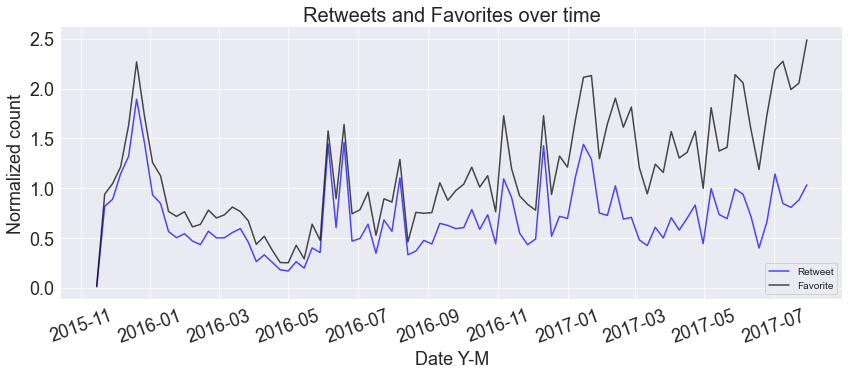

In [54]:
sns.set_style("darkgrid") # inserting a background style for the views

plt.subplots(figsize=(14, 5)) # adjusting the chart size

# plotting the graphs
plt.plot(retw, color='Blue', alpha = 0.7, label='Retweet')
plt.plot(favo, color='black', alpha = 0.7, label='Favorite')

# adjusting the font size of the axes
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# placing the x-axis information vertically
plt.xticks(rotation = 20)

# placing titles to graphics and adjusting font sizes
plt.title('Retweets and Favorites over time', fontsize=20)
plt.xlabel('Date Y-M', fontsize=18)
plt.ylabel('Normalized count', fontsize=18)
plt.legend()
sns.despine(left=True, bottom=True)

plt.savefig('retweets_Favotites.png') # saving the chart to a .png file
plt.show()

In this analysis I decided to normalize the data for retweets and favorites to identify the trend of which tool followers of the profile use most to interact with the profile. Since the beginning of the sample, the 'favorites' tool has been preferred by users, but with little difference in usage for retweets until the end of the first quarter of 2017. There is a notable upward trend and greater use of favorites by the user until the end Sample. In this way, the profile can create strategies for comments relating the tool favorites.

<a id='insight_two'></a>
### 2. Second Insight - The most retweeted and favorite stages

In [45]:
# creating a subset with some variables
stage = twitter_archive_master.query('dog_type in ["doggo, puppo", "doggo", "puppo", "floofer", "doggo, pupper", "doggo, floofer", "pupper"]')
stage.dog_type.value_counts()

pupper            203
doggo              62
puppo              22
doggo, pupper       9
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_type, dtype: int64

In [46]:
# keeping the sum of retweets and favotites counts of the breeds in variables
pred_ret = stage.groupby('dog_type').agg({'normalize_retweet': 'mean'}).sort_values('normalize_retweet',
                                                                                   ascending=False).reset_index()
pred_fav = stage.groupby('dog_type').agg({'normalize_favorite': 'mean'}).sort_values('normalize_favorite',
                                                                                    ascending=False).reset_index()

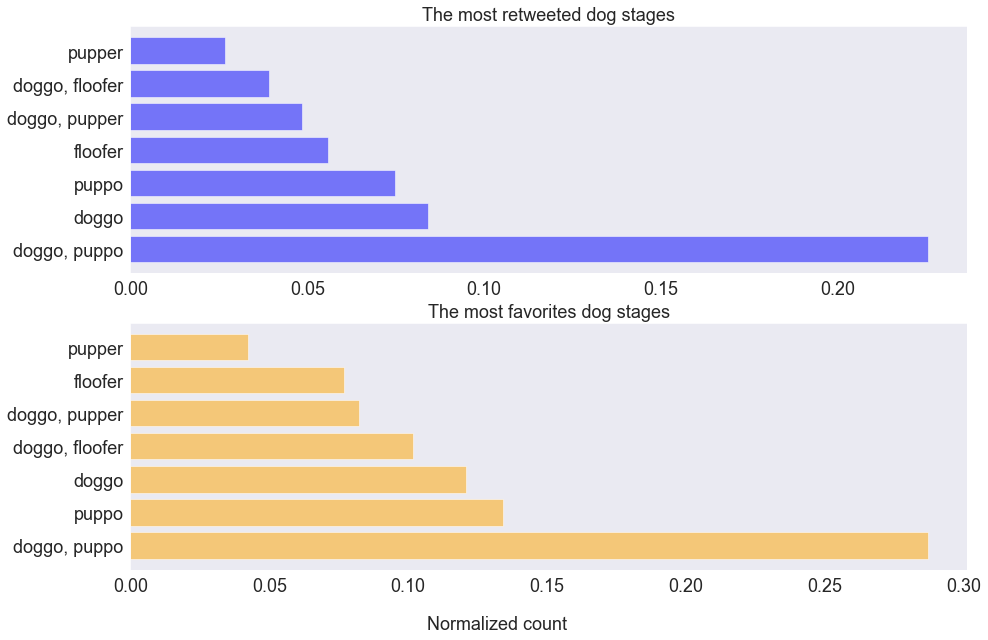

In [55]:
sns.set_style("dark") # inserting a background style for the views

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10)) # adjusting the chart size

# loop for with the names of the breeds
dogs_ret = [dogs_ret for dogs_ret, pred_ret in stage.groupby('dog_type')]
dogs_fav = [dogs_fav for dogs_fav, pred_fav in stage.groupby('dog_type')]

# plotting the graphs
ax1.barh(pred_ret.dog_type, pred_ret.normalize_retweet, alpha = 0.5, color='blue')
ax2.barh(pred_fav.dog_type, pred_fav.normalize_favorite, alpha = 0.5, color='orange')

# adjusting the font size of the axes
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# chart titles
ax1.set_title('The most retweeted dog stages', fontsize=18)
ax2.set_title('The most favorites dog stages', fontsize=18)
        
# adjusting the headings in the center of the graphs
fig.text(0.4, 0.05, 'Normalized count', va='center', rotation='horizontal', fontsize=18)

plt.savefig('stages_dog.png') # saving the chart to a .png file
plt.show()

In this analysis it extracts the most retweeted and favored dog stages by users. It was a very complex cleaning job, to identify some tweets with more than one stage. Finally, I normalized the count of retweets and favorites to get a better view. The 'doggo, puppo' stage gets the most amount of tweets and retweets, followed by 'puppo' and 'doggo'. The stages characterize through the algorithm, size and age of the dog. It is a way of understanding the dog profile that users tweet, which looks like a way of engaging with users. Being 'doggo, puppo' in the first position, users may appreciate more pictures with two dogs. An analysis that would need to be proven statistically.

<a id='insight_three'></a>
### 3. Third Insight - Possible trend between rating and predictions

In [111]:
# creating a new variable with the normalized rating_numerator
twitter_archive_master['rating_numerator_normalize'] = normalize(twitter_archive_master.rating_numerator)

In [112]:
# I created a function in which I could put all the prediction hits in a new column, regardless of whether it was the first,
# second or third attempt of the algorithm
# The function travels line by line, and what is true searches for the breed of dog
def pred(row):
    if row.p1_dog == True:
        return row.p1
    elif row.p2_dog == True:
        return row.p2
    elif row.p3_dog == True:
        return row.p3
    else:
        return np.NaN

# here the new column with the correct predictions
twitter_archive_master['pred_dog'] = twitter_archive_master.apply(pred, axis = 1)

In [113]:
# creating a subset with new data
tendence = twitter_archive_master[['pred_dog', 'rating_numerator', 'normalize_retweet', 'normalize_favorite']]

In [114]:
# using a pandas groupby to group variables by pred_dog
tend = tendence.groupby('pred_dog').agg({'rating_numerator':'mean', 'normalize_retweet':'sum',
                                     'normalize_favorite':'sum'}).head(10).sort_values('pred_dog', ascending=False)

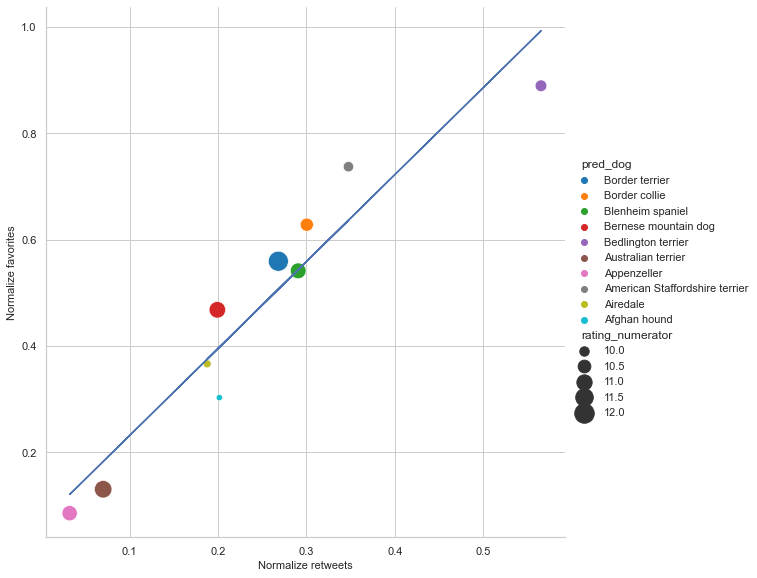

In [115]:
sns.set_theme(style="whitegrid") # inserting a background style for the views

# plotting the graph
sns.relplot(x="normalize_retweet", y="normalize_favorite",
            hue='pred_dog', size='rating_numerator',
            sizes=(40, 400), alpha=1, palette='tab10',
            height=8, data=tend)

# entering the font titles and sizes
plt.xlabel('Normalize retweets', fontsize=11)
plt.ylabel('Normalize favorites', fontsize=11)

# to create the trend line I used the information on this link
# https://pt.stackoverflow.com/questions/463589/linha-de-tendencia-em-scatterplot-no-matplotlib-em-python
# put the axes in variables
x = tend.normalize_retweet
y = tend.normalize_favorite

# using the numpy polynomial function
z = np.polyfit(tend.normalize_retweet, tend.normalize_favorite, 1)
p = np.poly1d(z)

# plotting the trend line graph
plt.plot(x,p(x),"b-")

sns.despine() # removing the top and right columns

plt.savefig('ratings_predictions.png') # saving the chart to a .png file
plt.show()

Here I tried to understand if there is any correlation between the count of retweets and favorites with the evaluation, of the 10 dog breeds with the best marks given by the users. Through the scatterplot, we can see that there is a tendency for more retweets, more favorites. However, this does not mean higher ratings. The bedlinton terrier breed did not get the best rating, but it was far superior in terms of likes and favorites. The breed with the highest score was the Border Terrier followed by the Australian Terrier breed, but with the least amount of retweets and favorites. Perhaps the algorithm will be able to analyze previous evaluations and adopt new interactions with the profile public, with the objective of involving its users even more. It is also worth noting that the Airedale race, second with the most retweets and favourites, has the lowest numerator_rating in the top 10.